In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Лабораторная работа 6.

## Решение СЛАУ методом Якоби

In [ ]:
def solve_jacobi(A, f, eps):
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)

    P = np.dot(-D_inv, A - D)
    g = np.dot(D_inv, f)

    x = g
    iters = 0
    while True:
        iters += 1
        x_next = np.dot(P, x) + g
        if np.linalg.norm(x - x_next, np.inf) < eps:
            return x_next, iters           
        x = x_next


## Решение СЛАУ методом Зейделя

In [ ]:
def solve_seidel(A, f, eps):
    D = np.diag(np.diag(A))
    L = np.tril(A)
    U = A - L

    x = np.dot(np.linalg.inv(D), f)
    iters = 0
    while True:
        iters += 1
        x_next = np.dot(np.linalg.inv(L), f - np.dot(U, x))
        if np.linalg.norm(x - x_next, np.inf) < eps:
            return x_next, iters          
        x = x_next

## Сравнение методов

### Генератор матриц

In [ ]:
def generate(n, segment, dd=True):
    a, b = segment
    A = np.random.uniform(a, b, size=(n,n))

    if not dd:
        return A

    diag = np.diag(A)
    delta_diag = [np.sum(np.abs(A[i]), where=(np.arange(n)!=i)) for i in range(n)]
    A += np.diag(np.sign(diag) * delta_diag)

    for i in range(n):
        A[i] *= np.abs(np.random.uniform(a, b)) / np.abs(A[i, i])

    return A

### Сравнение

In [ ]:
def solve(n, method, segment=(-10, 10)):
    x_true = np.random.uniform(*segment, n)
    A = generate(n, segment)
    S = A
    f = np.random.uniform(*segment, n)

    eps = 10e-6

    _, iters = solve_jacobi(S, f, eps) if method == "jacobi" else solve_seidel(S, f, eps)

    return iters

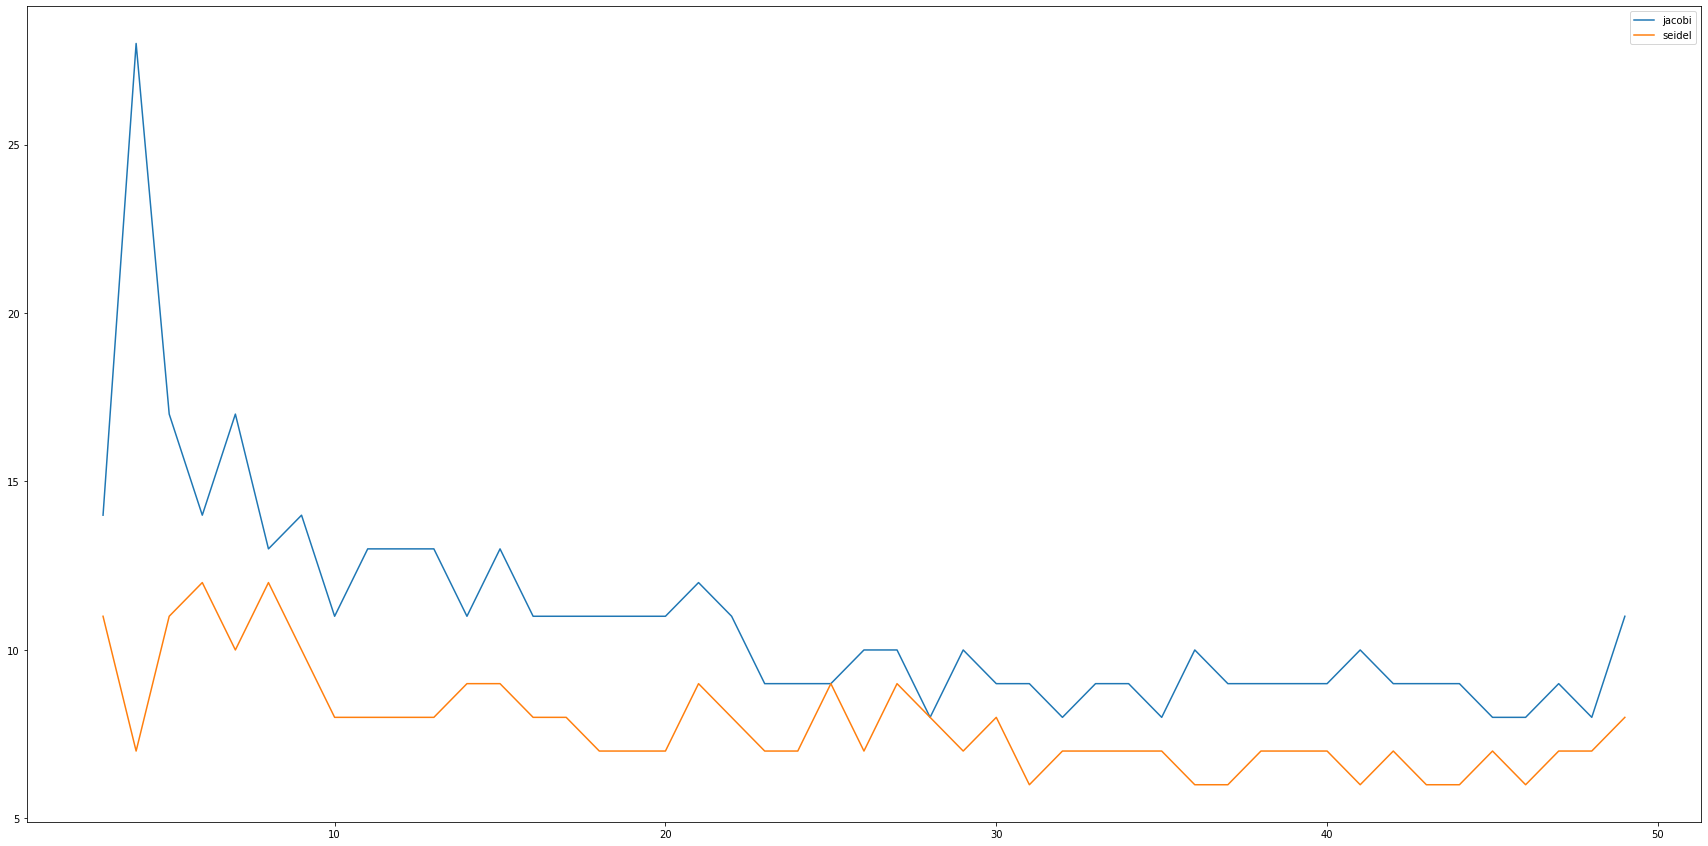

In [ ]:
segment = (-10, 10)

N = np.arange(3, 50, 1)

jacobi_iters = [solve(n, "jacobi") for n in N]
seidel_iters = [solve(n, "seidel") for n in N]

plt.figure(figsize=(30, 15))
plt.plot(N, jacobi_iters, label="jacobi");
plt.plot(N, seidel_iters, label="seidel");
plt.legend()
plt.show()